In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data, io, filters, color, exposure
from skimage.transform import rotate
import pandas as pd

%matplotlib inline

In [3]:
## Onetime run to unzip the images
#!unzip Dataset/img_align_celeba.zip -d Dataset/Raw > /dev/null

In [2]:
# import shutil
# shutil.rmtree('Dataset/Raw')

import cv2

In [3]:
## Appending all images as an array
import glob
import time
list_of_images = []
start_val = 1
stop_val = 50000 #202599
dir_val = 'Dataset/Raw/img_align_celeba/'

start = time.time()
for i in range(start_val,(stop_val + 1)): 
    curr_pic = str(i)
    curr_pic = ''.join(['0' for x in range(6-len(curr_pic))]) + curr_pic
    curr_pic = dir_val + curr_pic + ".jpg"
    training_set = cv2.imread(curr_pic)
    list_of_images.append(training_set)

    if(i%5000==0):
      print('Curr iteration is ' + str(i))

stop = time.time()

training_set = np.array(list_of_images)
del list_of_images

Curr iteration is 5000
Curr iteration is 10000
Curr iteration is 15000
Curr iteration is 20000
Curr iteration is 25000
Curr iteration is 30000
Curr iteration is 35000
Curr iteration is 40000
Curr iteration is 45000
Curr iteration is 50000


In [2]:
# dir_val = 'Dataset/Raw/img_align_celeba/*.jpg'
# image_paths = io.ImageCollection(dir_val)[:50000].files
# training_set = io.ImageCollection(image_paths).concatenate()

In [3]:
training_set.shape

(50000, 218, 178, 3)

In [4]:
import gc
gc.collect()

4

In [4]:
## The attribute csv with all features

attribute_df = pd.read_csv('Dataset/list_attr_celeba.csv')
attribute_df = attribute_df.loc[:(stop_val -1 )]
attribute_df

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0      000001.jpg                -1                1           1   
1      000002.jpg                -1               -1          -1   
2      000003.jpg                -1               -1          -1   
3      000004.jpg                -1               -1           1   
4      000005.jpg                -1                1           1   
...           ...               ...              ...         ...   
49995  049996.jpg                -1               -1          -1   
49996  049997.jpg                -1               -1           1   
49997  049998.jpg                -1               -1          -1   
49998  049999.jpg                -1                1           1   
49999  050000.jpg                -1               -1           1   

       Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                   -1    -1     -1        -1        -1          -1  ...   
1                    1    -1     -1        -1         1          -1  ...   
2                   -1    -1     -1         1        -1          -1  ...   
3                   -1    -1     -1        -1        -1          -1  ...   
4                   -1    -1     -1         1        -1          -1  ...   
...                ...   ...    ...       ...       ...         ...  ...   
49995               -1    -1     -1        -1        -1          -1  ...   
49996               -1    -1      1        -1        -1          -1  ...   
49997               -1    -1     -1        -1        -1           1  ...   
49998                1    -1     -1         1         1          -1  ...   
49999               -1    -1     -1         1        -1          -1  ...   

       Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0             -1        1              1         -1                 1   
1             -1        1             -1         -1                -1   
2             -1       -1             -1          1                -1   
3             -1       -1              1         -1                 1   
4             -1       -1             -1         -1                -1   
...          ...      ...            ...        ...               ...   
49995         -1        1             -1          1                 1   
49996         -1        1             -1          1                 1   
49997         -1       -1              1         -1                -1   
49998         -1        1             -1          1                -1   
49999         -1       -1             -1         -1                 1   

       Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  Young  
0               -1                 1                -1               -1      1  
1               -1                -1                -1               -1      1  
2               -1                -1                -1               -1      1  
3               -1                 1                 1               -1      1  
4               -1                 1                -1               -1      1  
...            ...               ...               ...              ...    ...  
49995           -1                 1                -1               -1      1  
49996           -1                 1                -1               -1      1  
49997           -1                -1                -1               -1      1  
49998            1                 1                -1               -1      1  
49999           -1                 1                -1               -1      1  

[50000 rows x 41 columns]

In [5]:
attribute_df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [6]:
## Choosing the first 30000 as the training set and the rest 20000 as the test set

x_train = training_set[:30000,:,:,:]
x_test = training_set[30000:,:,:,:]
del training_set

In [7]:
curr_y = np.where(attribute_df['Smiling']==1,1,0) ## Converting -1 to 0
y_train = curr_y[:30000]
y_test = curr_y[30000:]

Current Data Size : (20000, 218, 178, 3)


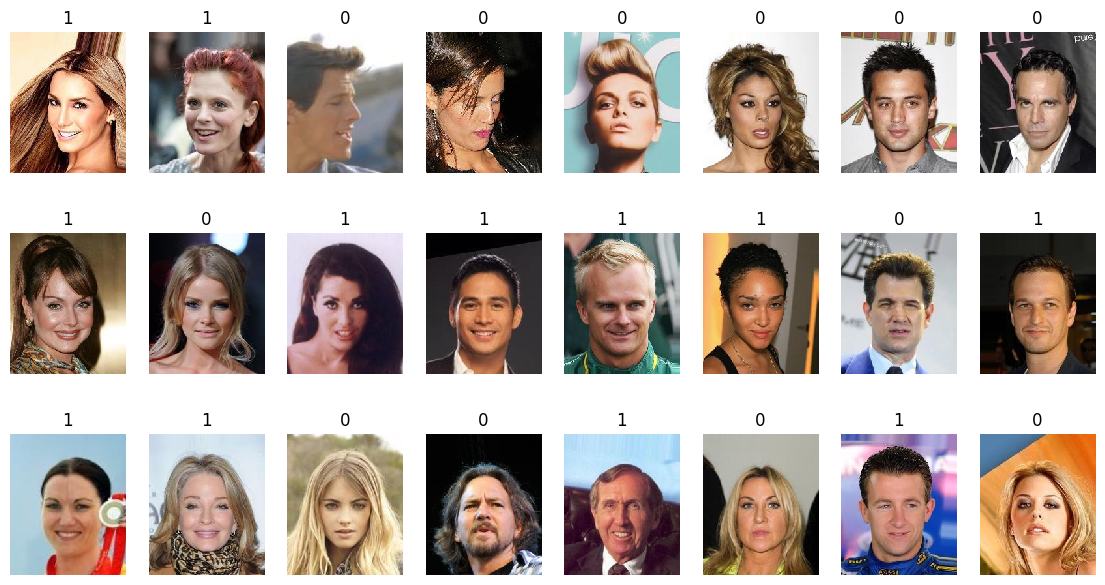

In [11]:
## Checking images. 1 - indicates smiling and 0 indicates not smiling

print ("Current Data Size :" , x_test.shape)
plt.rcParams['figure.figsize'] = (8,8)

# Display the first few  training images
images_and_labels = list(zip(x_train[:24], y_train[:24]))
plt.figure(figsize=(14,10))
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(4, 8, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    index = str(label)
    plt.title(index)
plt.show()

In [8]:
#import tensorflow.keras as keras
#from tensorflow.keras import layers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.optimizers import SGD, Adadelta
#from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.applications import VGG19

2023-05-07 14:02:11.648261: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-07 14:02:14.120523: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 14:02:25.485356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
def base_model_1(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
   
    return model

In [ ]:
print(K.image_data_format())

channels_last


In [29]:
## Building the first model

input_shape = (218,178,3)
num_classes = 1
model = base_model_1(input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 216, 176, 32)      896       
                                                                 
 batch_normalization_1 (Batc  (None, 216, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 214, 174, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 107, 87, 64)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 107, 87, 64)       0         
                                                                 
 flatten_1 (Flatten)         (None, 595776)           

In [30]:
# Train model
model.compile(loss=BinaryCrossentropy(from_logits=False),
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [19]:
# Fit model
epochs = 100
batch_size=32

In [31]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100


2023-05-06 17:15:11.694383: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 47s 49ms/step - loss: 0.5480 - accuracy: 0.7323 - val_loss: 0.3751 - val_accuracy: 0.8449
Epoch 2/100
938/938 [==============================] - 43s 46ms/step - loss: 0.3835 - accuracy: 0.8324 - val_loss: 0.3115 - val_accuracy: 0.8702
Epoch 3/100
938/938 [==============================] - 43s 46ms/step - loss: 0.3297 - accuracy: 0.8601 - val_loss: 0.2914 - val_accuracy: 0.8798
Epoch 4/100
938/938 [==============================] - 43s 46ms/step - loss: 0.2971 - accuracy: 0.8763 - val_loss: 0.2776 - val_accuracy: 0.8832
Epoch 5/100
938/938 [==============================] - 43s 46ms/step - loss: 0.2771 - accuracy: 0.8839 - val_loss: 0.2790 - val_accuracy: 0.8839
Epoch 6/100
938/938 [==============================] - 43s 46ms/step - loss: 0.2575 - accuracy: 0.8947 - val_loss: 0.2715 - val_accuracy: 0.8878
Epoch 7/100
938/938 [==============================] - 43s 46ms/step - loss: 0.2425 - accuracy: 0.9015 - val_loss: 0.2603 - val_accuracy: 0.89

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: [0.3506805896759033, 0.9032999873161316]


In [33]:
check_pred = model.predict(x_test)

625/625 [==============================] - 6s 9ms/step


In [34]:
check_pred

array([[9.8118281e-01],
       [7.2104940e-03],
       [9.9957079e-01],
       ...,
       [1.9124907e-01],
       [9.9999928e-01],
       [5.2916538e-04]], dtype=float32)

In [35]:
model.save('Saved_Models/Model_1_100_21.h5') ## Saving the model

In [39]:
new_model = load_model('Saved_Models/Model_1_100_21.h5')
new_model.summary()
del new_model ## Deleting the model variable to save memory

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 216, 176, 32)      896       
                                                                 
 batch_normalization_1 (Batc  (None, 216, 176, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 214, 174, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 107, 87, 64)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 107, 87, 64)       0         
                                                                 
 flatten_1 (Flatten)         (None, 595776)           

## Model 2

In [41]:
del model ## Deleting the model variable to save memory

In [9]:
def base_model_2(input_shape):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                    padding='same'))
    model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
   
    return model

In [10]:
input_shape = (218,178,3)
model = base_model_2(input_shape)
model.summary()

2023-05-06 20:21:18.129247: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46671 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:1a:00.0, compute capability: 8.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 178, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 218, 178, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 89, 16)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 89, 32)       4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 89, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 44, 32)       0         
 2D)                                                    

2023-05-06 20:21:18.130023: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46671 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2023-05-06 20:21:18.130674: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 46671 MB memory:  -> device: 2, name: NVIDIA RTX A6000, pci bus id: 0000:88:00.0, compute capability: 8.6
2023-05-06 20:21:18.131340: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 46671 MB memory:  -> device: 3, name: NVIDIA RTX A6000, pci bus id: 0000:89:00.0, compute capability: 8.6
2023-05-06 20:21:18.131898: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:4 with 46671 MB memory:  -> device: 4, name: NVIDIA RTX A6000, pci bus id: 0000:b1:00.0, 

In [7]:
my_callbacks = [
    EarlyStopping(monitor = 'accuracy',patience=3,verbose=1) ## Training will stop if accuracy does not improve over 3 epochs
    # ReduceLROnPlateau(monitor='val_loss', factor=0.2,
    #                           patience=5, min_lr=0.0001)
]

In [11]:
model.compile(loss=BinaryCrossentropy(from_logits=False),
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [12]:
epochs = 80
batch_size = 32

In [13]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=my_callbacks)

Epoch 1/80


2023-05-06 20:21:32.221073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-05-06 20:21:33.009511: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-06 20:21:33.161411: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-06 20:21:33.205598: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x18847550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-06 20:21:33.205653: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2023-05-06 20:21:33.205671: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2023-05-06 20:21:33.205690: I tensorflow/compiler/xla/service/service.cc:

938/938 [==============================] - 29s 25ms/step - loss: 3.3110 - accuracy: 0.6491 - val_loss: 1.0497 - val_accuracy: 0.7815
Epoch 2/80
938/938 [==============================] - 20s 22ms/step - loss: 1.4539 - accuracy: 0.7612 - val_loss: 1.0187 - val_accuracy: 0.7829
Epoch 3/80
938/938 [==============================] - 21s 22ms/step - loss: 1.0949 - accuracy: 0.7937 - val_loss: 1.2682 - val_accuracy: 0.7541
Epoch 4/80
938/938 [==============================] - 21s 22ms/step - loss: 0.8653 - accuracy: 0.8178 - val_loss: 0.8188 - val_accuracy: 0.8249
Epoch 5/80
938/938 [==============================] - 21s 22ms/step - loss: 0.7720 - accuracy: 0.8305 - val_loss: 0.5304 - val_accuracy: 0.8580
Epoch 6/80
938/938 [==============================] - 21s 22ms/step - loss: 0.6562 - accuracy: 0.8438 - val_loss: 0.6495 - val_accuracy: 0.8290
Epoch 7/80
938/938 [==============================] - 20s 22ms/step - loss: 0.5846 - accuracy: 0.8532 - val_loss: 0.6277 - val_accuracy: 0.8296
Epo

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: [0.4052433371543884, 0.8932499885559082]


In [15]:
model.save('Saved_Models/Model_2_80_32_vgglike.h5')